# Telco Customer Churn Prediction

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.drop("customerID",axis="columns",inplace=True)

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
cat_col=df.select_dtypes(object).columns


for col in cat_col:
    df[col]=df[col].astype('category')

df[cat_col]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [8]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df["TotalCharges"].dtype

CategoricalDtype(categories=[' ', '100.2', '100.25', '100.35', '100.4', '100.8', '100.9',
                  '1001.2', '1001.5', '1003.05',
                  ...
                  '995.35', '996.45', '996.85', '996.95', '997.65', '997.75',
                  '998.1', '999.45', '999.8', '999.9'],
, ordered=False, categories_dtype=object)

In [10]:
df['TotalCharges'].value_counts().sort_index()

TotalCharges
          11
100.2      1
100.25     1
100.35     1
100.4      1
          ..
997.75     1
998.1      1
999.45     1
999.8      1
999.9      1
Name: count, Length: 6531, dtype: int64

In [11]:
df['TotalCharges']=np.where(df['TotalCharges']==" ",np.nan,df['TotalCharges'])
df['TotalCharges'].value_counts().sort_index()

TotalCharges
100.2     1
100.25    1
100.35    1
100.4     1
100.8     1
         ..
997.75    1
998.1     1
999.45    1
999.8     1
999.9     1
Name: count, Length: 6530, dtype: int64

In [12]:
df['TotalCharges']=df['TotalCharges'].apply(float)

In [13]:
df['TotalCharges']=df['TotalCharges'].fillna(df["TotalCharges"].mean())
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
num_col=df.select_dtypes(include=["int","float"]).columns.to_list()
num_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [15]:
cat_col=df.select_dtypes('category').columns
df[cat_col]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [16]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### EDA

In [17]:
d=df[df["Churn"]=="Yes"]['gender'].value_counts().to_frame().reset_index()
d

,gender,count
0,Female,939
1,Male,930


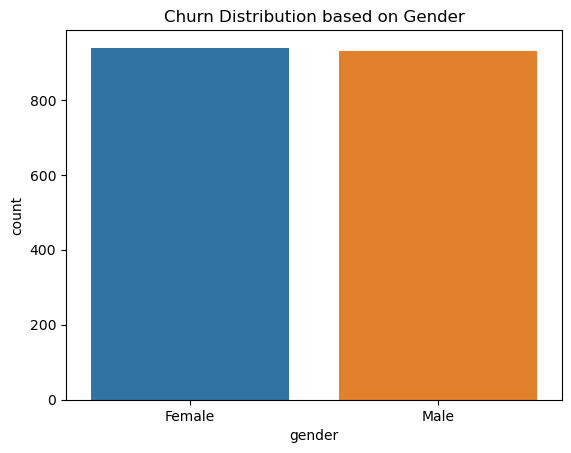

In [18]:
sns.barplot(x="gender",y='count',data=d,hue="gender")
plt.title("Churn Distribution based on Gender")
plt.show()

In [19]:
d=df[df["Churn"]=="Yes"]["Contract"].value_counts().to_frame().reset_index()
d

,Contract,count
0,Month-to-month,1655
1,One year,166
2,Two year,48


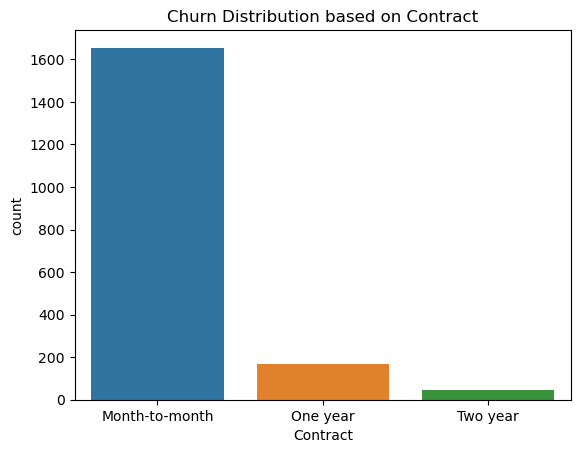

In [20]:
sns.barplot(x="Contract",y='count',data=d,hue="Contract")
plt.title("Churn Distribution based on Contract")
plt.show()

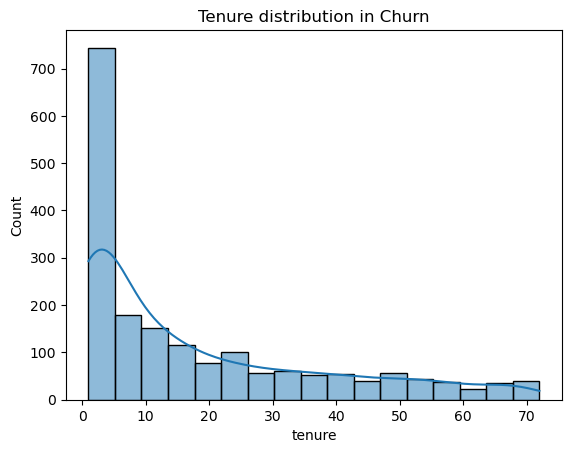

In [21]:
sns.histplot(data=df[df["Churn"]=="Yes"],x="tenure",kde=True)
plt.title("Tenure distribution in Churn")
plt.show()

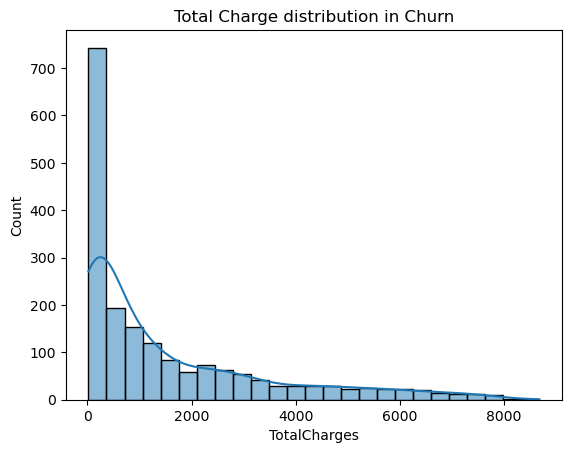

In [22]:
sns.histplot(data=df[df["Churn"]=="Yes"],x="TotalCharges",kde=True)
plt.title("Total Charge distribution in Churn")
plt.show()

In [23]:
d=df[df["Churn"]=="Yes"]["Partner"].value_counts().to_frame().reset_index()
d

,Partner,count
0,No,1200
1,Yes,669


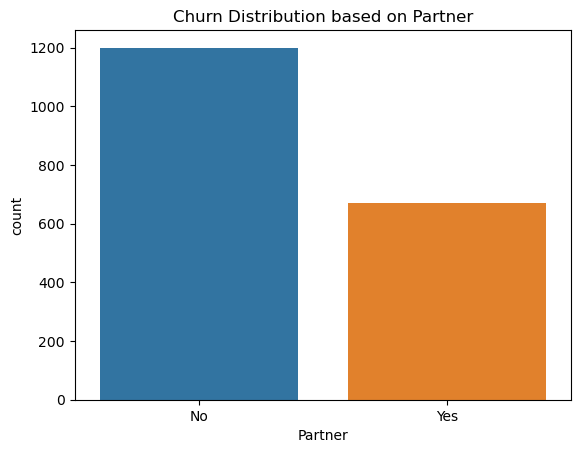

In [24]:
sns.barplot(x="Partner",y='count',data=d,hue="Partner")
plt.title("Churn Distribution based on Partner")
plt.show()

In [25]:
d=df[df["Churn"]=="Yes"]["SeniorCitizen"].value_counts().to_frame().reset_index()
d

,SeniorCitizen,count
0,0,1393
1,1,476


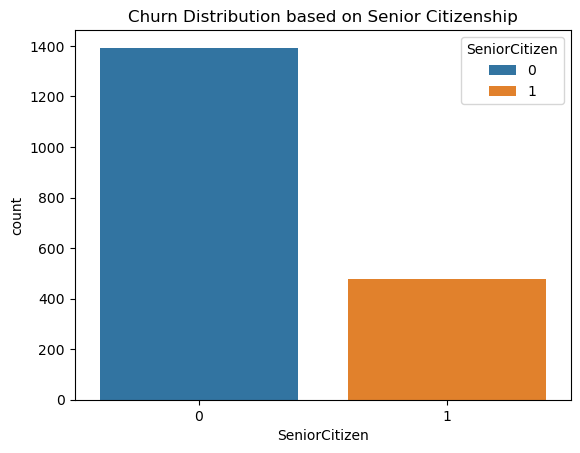

In [26]:
sns.barplot(x="SeniorCitizen",y='count',data=d,hue="SeniorCitizen")
plt.title("Churn Distribution based on Senior Citizenship")
plt.show()

In [27]:
d=df[df["Churn"]=="Yes"]["Dependents"].value_counts().to_frame().reset_index()
d

,Dependents,count
0,No,1543
1,Yes,326


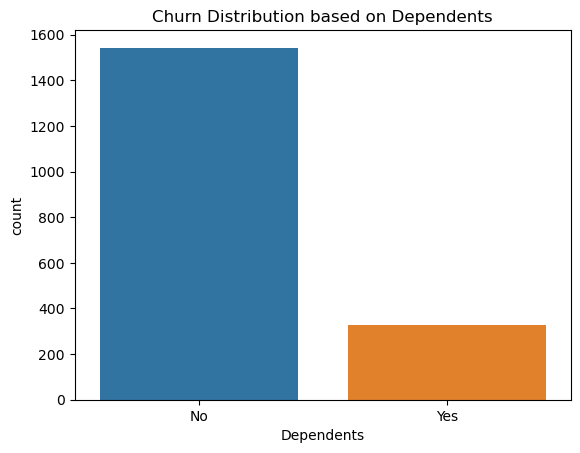

In [28]:
sns.barplot(x="Dependents",y='count',data=d,hue="Dependents")
plt.title("Churn Distribution based on Dependents")
plt.show()

In [29]:
yes_map={"No":0,"Yes":1}

for x in ['Partner', 'Dependents', 'PhoneService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling', 'Churn']:
    print("--")
    print(df[x].value_counts())

--
Partner
No     3641
Yes    3402
Name: count, dtype: int64
--
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
--
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
--
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
--
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
--
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
--
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
--
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64
--
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64
--
PaperlessBilling
Yes    4171
No     2872
Na

In [30]:
for aa in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df[aa]=df[aa].replace({"No internet service":"No"})

/tmp/ipykernel_20943/3706130155.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[aa]=df[aa].replace({"No internet service":"No"})


In [31]:
for x in ['Partner', 'Dependents', 'PhoneService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling', 'Churn']:
    print("--")
    print(df[x].value_counts())

--
Partner
No     3641
Yes    3402
Name: count, dtype: int64
--
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
--
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
--
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64
--
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64
--
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64
--
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64
--
StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64
--
StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64
--
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64
--
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [32]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [33]:
len(df)

7043

In [34]:
df['MultipleLines']=df["MultipleLines"].replace({"No phone service":"No"})

/tmp/ipykernel_20943/1651790200.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['MultipleLines']=df["MultipleLines"].replace({"No phone service":"No"})


In [35]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [36]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [37]:
df["PaymentMethod"].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [38]:
cat_col=df.select_dtypes('category').columns.to_list()
df[cat_col]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [39]:
cat_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

## Scaling and Encoding Features

In [41]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [42]:
df["SeniorCitizen"]=df["SeniorCitizen"].map({0:"No",1:"Yes"}).astype("category")
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [43]:
df["Churn"]=df["Churn"].map({"Yes":1,"No":0}).astype(int)

In [44]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [45]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [46]:
cat_col=df.select_dtypes("category").columns
cat_col

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [47]:
df[cat_col]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,No,Yes,Yes,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [48]:
category_encode={}

for col in cat_col:
    category_encode[col]=df[col].cat.categories.to_list()

category_encode


{'gender': ['Female', 'Male'],
 'SeniorCitizen': ['No', 'Yes'],
 'Partner': ['No', 'Yes'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes'],
 'OnlineBackup': ['No', 'Yes'],
 'DeviceProtection': ['No', 'Yes'],
 'TechSupport': ['No', 'Yes'],
 'StreamingTV': ['No', 'Yes'],
 'StreamingMovies': ['No', 'Yes'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['No', 'Yes'],
 'PaymentMethod': ['Bank transfer (automatic)',
  'Credit card (automatic)',
  'Electronic check',
  'Mailed check']}

In [49]:
x=df.drop("Churn",axis="columns")
y=df['Churn']

In [50]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

#### Model driven Feature Extraction

In [51]:
importances=np.zeros(x.shape[1])

from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import classification_report,average_precision_score,roc_auc_score,roc_curve
from lightgbm import LGBMClassifier

skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=32)
pr=[]
roc=[]

for idx, (train_idx,test_idx) in enumerate(skf.split(x,y)):
    x_train,y_train=x.iloc[train_idx],y.iloc[train_idx]
    x_test,y_test=x.iloc[test_idx],y.iloc[test_idx]

    scale_pos_weight=(y_train==0).sum()/(y_train==1).sum()
    model=LGBMClassifier(importance_type="split",objective="binary",random_state=32,scale_pos_weight=scale_pos_weight)
    model.fit(x_train,y_train)

    y_pred_proba=model.predict_proba(x_test)[:,1]
    fold_pr=average_precision_score(y_test,y_pred_proba)
    pr.append(fold_pr)
    importances+=model.feature_importances_*fold_pr
    roc.append(roc_auc_score(y_test,y_pred_proba))

    print(f"For {idx} fold, PR_Score: {fold_pr} ; ROC_AUC_Score: {roc_auc_score(y_test,y_pred_proba)}")

importances/=sum(pr)

[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
For 0 fold, PR_Score: 0.6568995775929297 ; ROC_AUC_Score: 0.8318349737787076
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points i

In [52]:
print("PR Scores: ",pr)
print("Mean PR: ",sum(pr)/len(pr))
print("ROC Scores: ",roc)
print("Mean ROC Score: ",sum(roc)/len(roc))

PR Scores:  [0.6568995775929297, 0.635495098449791, 0.6512682040462627, 0.6485755565308028, 0.6453983398449288]
Mean PR:  0.647527355292943
ROC Scores:  [0.8318349737787076, 0.8341535560205637, 0.8404647497997881, 0.8356412946341842, 0.8276021679992552]
Mean ROC Score:  0.8339393484464998


In [53]:
important_df=pd.DataFrame({"columns":x.columns,"importance":importances})
important_df

,columns,importance
0,gender,110.783686
1,SeniorCitizen,54.743243
2,Partner,57.229538
3,Dependents,55.603693
4,tenure,483.856574
5,PhoneService,34.626614
6,MultipleLines,48.246116
7,InternetService,50.405582
8,OnlineSecurity,63.387768
9,OnlineBackup,59.212878


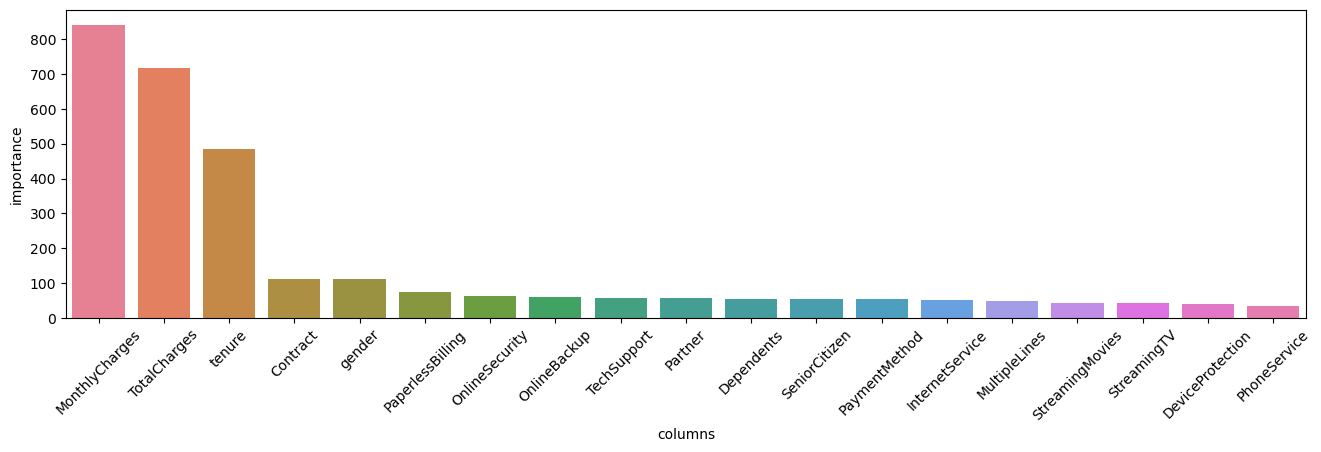

In [54]:
important_df=important_df.sort_values(by="importance",ascending=False)
plt.figure(figsize=(16,4))
sns.barplot(important_df,x="columns",y="importance",hue="columns")
plt.xticks(rotation=45)
plt.show()

In [55]:
# Selecting top 70% features 
important_df=important_df[important_df["importance"]>important_df["importance"].quantile(0.30)]
important_df

,columns,importance
17,MonthlyCharges,842.469663
18,TotalCharges,716.784578
4,tenure,483.856574
14,Contract,111.648666
0,gender,110.783686
15,PaperlessBilling,75.024157
8,OnlineSecurity,63.387768
9,OnlineBackup,59.212878
11,TechSupport,57.563087
2,Partner,57.229538


In [56]:
x=x[important_df['columns'].values]
x

,MonthlyCharges,TotalCharges,tenure,Contract,gender,PaperlessBilling,OnlineSecurity,OnlineBackup,TechSupport,Partner,Dependents,SeniorCitizen,PaymentMethod
0,29.85,29.85,1,Month-to-month,Female,Yes,No,Yes,No,Yes,No,No,Electronic check
1,56.95,1889.50,34,One year,Male,No,Yes,No,No,No,No,No,Mailed check
2,53.85,108.15,2,Month-to-month,Male,Yes,Yes,Yes,No,No,No,No,Mailed check
3,42.30,1840.75,45,One year,Male,No,Yes,No,Yes,No,No,No,Bank transfer (automatic)
4,70.70,151.65,2,Month-to-month,Female,Yes,No,No,No,No,No,No,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,24,One year,Male,Yes,Yes,No,Yes,Yes,Yes,No,Mailed check
7039,103.20,7362.90,72,One year,Female,Yes,No,Yes,No,Yes,Yes,No,Credit card (automatic)
7040,29.60,346.45,11,Month-to-month,Female,Yes,Yes,No,No,Yes,Yes,No,Electronic check
7041,74.40,306.60,4,Month-to-month,Male,Yes,No,No,No,Yes,No,Yes,Mailed check


In [57]:
cat_col=x.select_dtypes("category").columns
cat_col

Index(['Contract', 'gender', 'PaperlessBilling', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'Partner', 'Dependents', 'SeniorCitizen',
       'PaymentMethod'],
      dtype='object')

# Model Training

#### Pipeline A (Tree Based Algorithms Except LightGBM)

In [58]:
temp_x=x.copy()

temp_x

,MonthlyCharges,TotalCharges,tenure,Contract,gender,PaperlessBilling,OnlineSecurity,OnlineBackup,TechSupport,Partner,Dependents,SeniorCitizen,PaymentMethod
0,29.85,29.85,1,Month-to-month,Female,Yes,No,Yes,No,Yes,No,No,Electronic check
1,56.95,1889.50,34,One year,Male,No,Yes,No,No,No,No,No,Mailed check
2,53.85,108.15,2,Month-to-month,Male,Yes,Yes,Yes,No,No,No,No,Mailed check
3,42.30,1840.75,45,One year,Male,No,Yes,No,Yes,No,No,No,Bank transfer (automatic)
4,70.70,151.65,2,Month-to-month,Female,Yes,No,No,No,No,No,No,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,24,One year,Male,Yes,Yes,No,Yes,Yes,Yes,No,Mailed check
7039,103.20,7362.90,72,One year,Female,Yes,No,Yes,No,Yes,Yes,No,Credit card (automatic)
7040,29.60,346.45,11,Month-to-month,Female,Yes,Yes,No,No,Yes,Yes,No,Electronic check
7041,74.40,306.60,4,Month-to-month,Male,Yes,No,No,No,Yes,No,Yes,Mailed check


In [59]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

label_encode={}

for col in cat_col:
    temp_x[col]=lab.fit_transform(temp_x[[col]])
    label_encode[col]=dict(zip(lab.classes_,lab.transform(lab.classes_)))

temp_x


/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-v

,MonthlyCharges,TotalCharges,tenure,Contract,gender,PaperlessBilling,OnlineSecurity,OnlineBackup,TechSupport,Partner,Dependents,SeniorCitizen,PaymentMethod
0,29.85,29.85,1,0,0,1,0,1,0,1,0,0,2
1,56.95,1889.50,34,1,1,0,1,0,0,0,0,0,3
2,53.85,108.15,2,0,1,1,1,1,0,0,0,0,3
3,42.30,1840.75,45,1,1,0,1,0,1,0,0,0,0
4,70.70,151.65,2,0,0,1,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,24,1,1,1,1,0,1,1,1,0,3
7039,103.20,7362.90,72,1,0,1,0,1,0,1,1,0,1
7040,29.60,346.45,11,0,0,1,1,0,0,1,1,0,2
7041,74.40,306.60,4,0,1,1,0,0,0,1,0,1,3


In [60]:
label_encode

{'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
 'gender': {'Female': 0, 'Male': 1},
 'PaperlessBilling': {'No': 0, 'Yes': 1},
 'OnlineSecurity': {'No': 0, 'Yes': 1},
 'OnlineBackup': {'No': 0, 'Yes': 1},
 'TechSupport': {'No': 0, 'Yes': 1},
 'Partner': {'No': 0, 'Yes': 1},
 'Dependents': {'No': 0, 'Yes': 1},
 'SeniorCitizen': {'No': 0, 'Yes': 1},
 'PaymentMethod': {'Bank transfer (automatic)': 0,
  'Credit card (automatic)': 1,
  'Electronic check': 2,
  'Mailed check': 3}}

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

In [87]:
x_train,x_test,y_train,y_test=train_test_split(temp_x,y,stratify=y,test_size=0.3,random_state=32)

In [64]:
x_train.shape,x_test.shape

((4930, 13), (2113, 13))

In [68]:
y_train.value_counts(),y_test.value_counts()

(Churn
 0    3622
 1    1308
 Name: count, dtype: int64,
 Churn
 0    1552
 1     561
 Name: count, dtype: int64)

In [72]:
def all_models(classifier, x_train, x_test, y_train, y_test):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)

    y_score=classifier.predict_proba(x_test)[:,1]

    pr_auc = average_precision_score(y_test, y_score)
    auc = roc_auc_score(y_test, y_score)

    print("PR AUC score:", pr_auc)
    print("AUC score:", auc)
    return pr_auc, auc

In [71]:
scale_pos_weight=(y_train==0).sum()/(y_train==1).sum()
scale_pos_weight

2.7691131498470947

In [75]:
models=[DecisionTreeClassifier(max_depth=6,min_samples_leaf=50,class_weight="balanced",random_state=42),
        RandomForestClassifier(n_estimators=300,max_depth=10,min_samples_leaf=20,class_weight="balanced",random_state=42),
        GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,max_depth=3,subsample=0.8,random_state=42),
        AdaBoostClassifier(n_estimators=200,learning_rate=0.5,random_state=42),XGBClassifier(n_estimators=300,learning_rate=0.05,max_depth=6,subsample=0.8,colsample_bytree=0.8,scale_pos_weight=scale_pos_weight,eval_metric="aucpr",tree_method="hist",
    random_state=42)]

pr_scores,auc_scores=[],[]
for model in models:
    print(model)
    pr_auc,auc=all_models(model,x_train,x_test,y_train,y_test)
    pr_scores.append(pr_auc)
    auc_scores.append(auc)

results={}
results["models"]=["DT","RF","GBC","ABC","XGBC"]
results['pr_auc']=pr_scores
results["auc_score"]=auc_scores
results=pd.DataFrame(results)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_leaf=50, random_state=42)
PR AUC score: 0.6043481519751119
AUC score: 0.8176804812834226
RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=20, n_estimators=300, random_state=42)
PR AUC score: 0.6463001331662334
AUC score: 0.8394803094621167
GradientBoostingClassifier(learning_rate=0.05, n_estimators=200,
                           random_state=42, subsample=0.8)
PR AUC score: 0.6574916329706382
AUC score: 0.8403824861716008
AdaBoostClassifier(learning_rate=0.5, n_estimators=200, random_state=42)
PR AUC score: 0.6496510354780233
AUC score: 0.8404749434919234
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
        

In [76]:
results.sort_values(by="pr_auc",ascending=False)

,models,pr_auc,auc_score
2,GBC,0.657492,0.840382
3,ABC,0.649651,0.840475
1,RF,0.646300,0.839480
4,XGBC,0.635080,0.827335
0,DT,0.604348,0.817680


#### Pipeline B (LightGBM)

In [77]:
x

,MonthlyCharges,TotalCharges,tenure,Contract,gender,PaperlessBilling,OnlineSecurity,OnlineBackup,TechSupport,Partner,Dependents,SeniorCitizen,PaymentMethod
0,29.85,29.85,1,Month-to-month,Female,Yes,No,Yes,No,Yes,No,No,Electronic check
1,56.95,1889.50,34,One year,Male,No,Yes,No,No,No,No,No,Mailed check
2,53.85,108.15,2,Month-to-month,Male,Yes,Yes,Yes,No,No,No,No,Mailed check
3,42.30,1840.75,45,One year,Male,No,Yes,No,Yes,No,No,No,Bank transfer (automatic)
4,70.70,151.65,2,Month-to-month,Female,Yes,No,No,No,No,No,No,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,24,One year,Male,Yes,Yes,No,Yes,Yes,Yes,No,Mailed check
7039,103.20,7362.90,72,One year,Female,Yes,No,Yes,No,Yes,Yes,No,Credit card (automatic)
7040,29.60,346.45,11,Month-to-month,Female,Yes,Yes,No,No,Yes,Yes,No,Electronic check
7041,74.40,306.60,4,Month-to-month,Male,Yes,No,No,No,Yes,No,Yes,Mailed check


In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=32,test_size=0.3)

In [80]:
x_train.shape,x_test.shape

((4930, 13), (2113, 13))

In [79]:
y_train.value_counts(),y_test.value_counts()

(Churn
 0    3622
 1    1308
 Name: count, dtype: int64,
 Churn
 0    1552
 1     561
 Name: count, dtype: int64)

In [81]:
scale_pos_weight=(y_train==0).sum()/(y_train==1).sum()
scale_pos_weight

2.7691131498470947

In [88]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(
    objective="binary",
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=8,
    min_child_samples=30,
    subsample=0.8,
    subsample_freq=1,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    importance_type="gain",
    random_state=32
)

model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 1308, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265314 -> initscore=-1.018527
[LightGBM] [Info] Start training from score -1.018527
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,8
,learning_rate,0.05
,n_estimators,500
,subsample_for_bin,200000
,objective,'binary'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,30


In [89]:
y_light=model.predict(x_test)
y_light_prob=model.predict_proba(x_test)[:,1]

In [91]:
print("LightGBM Metrics")
print("PR Score: ",average_precision_score(y_test,y_light_prob))
print("AUC Score: ",roc_auc_score(y_test,y_light_prob))

LightGBM Metrics
PR Score:  0.6196880169651368
AUC Score:  0.8184643585644192


In [86]:
results.sort_values(by="pr_auc",ascending=False)

,models,pr_auc,auc_score
2,GBC,0.657492,0.840382
3,ABC,0.649651,0.840475
1,RF,0.646300,0.839480
4,XGBC,0.635080,0.827335
0,DT,0.604348,0.817680


## Selecting Best model

In [92]:
x_train,x_test,y_train,y_test=train_test_split(temp_x,y,stratify=y,test_size=0.3,random_state=32)

best_model=GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,max_depth=3,subsample=0.8,random_state=42)

best_model.fit(x_train,y_train)

,loss,'log_loss'
,learning_rate,0.05
,n_estimators,200
,subsample,0.8
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [96]:
y_pred=best_model.predict(x_test)
y_proba=best_model.predict_proba(x_test)[:,1]

print("Final Metrics")
print(f"PR Score: {average_precision_score(y_test,y_proba)}")
print(f"ROC_AUC Score  : {roc_auc_score(y_test,y_proba)}")

Final Metrics
PR Score: 0.6574916329706382
ROC_AUC Score  : 0.8403824861716008


In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.67      0.51      0.58       561

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.80      2113



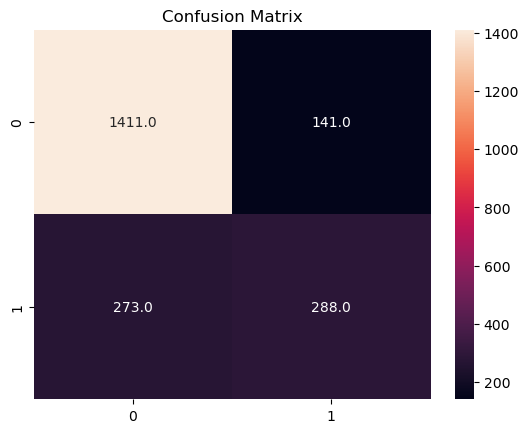

In [97]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt=".1f")
plt.title("Confusion Matrix")
plt.show()

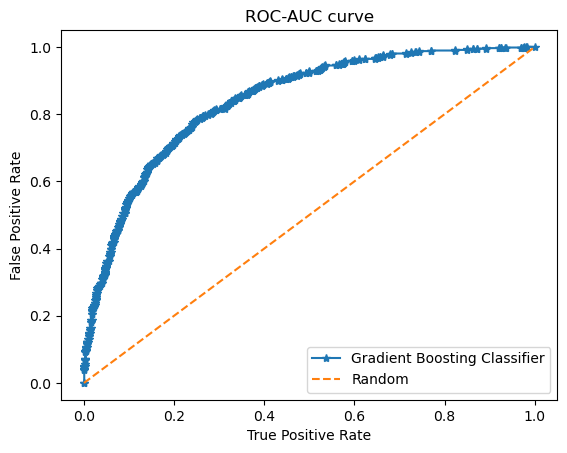

In [98]:
fpr,tpr,threshhold=roc_curve(y_test,y_proba)

plt.plot(fpr,tpr, label="Gradient Boosting Classifier",marker="*")
plt.plot([0,1],[0,1],label="Random",linestyle="--")
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("ROC-AUC curve")
plt.legend()
plt.show()

## Threshold tuning

In [130]:
from sklearn.metrics import fbeta_score,precision_score,recall_score,f1_score

/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


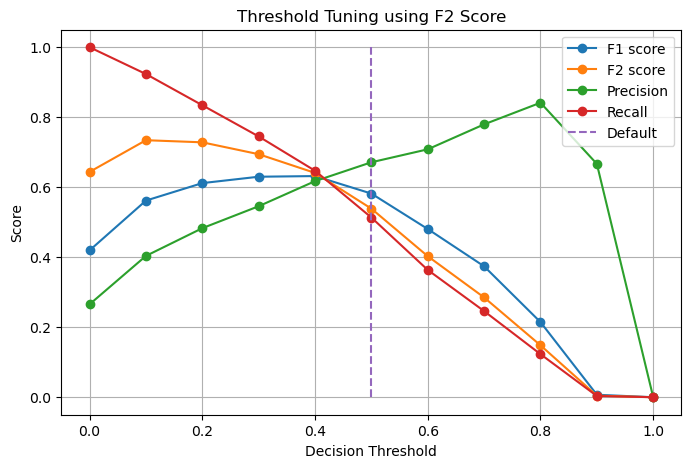

In [131]:
f2=[]
pre=[]
re=[]
lim=[]
f1=[]

for t in np.arange(0.0, 1.01, 0.1):
    y_thresh=(y_proba>=t).astype(int)
    f2.append(fbeta_score(y_test,y_thresh,beta=2))
    pre.append(precision_score(y_test,y_thresh))
    re.append(recall_score(y_test,y_thresh))
    f1.append(f1_score(y_test,y_thresh))
    lim.append(t)

plt.figure(figsize=(8,5))
plt.plot(lim, f1, marker="o", label="F1 score")
plt.plot(lim, f2, marker="o", label="F2 score")
plt.plot(lim, pre, marker="o", label="Precision")
plt.plot(lim, re, marker="o", label="Recall")
plt.plot([0.5,0.5],[0,1],label="Default",linestyle="--")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning using F2 Score")
plt.legend()
plt.grid(True)

plt.show()



In [122]:
y_actual=(y_proba>=0.4).astype(int) # Balanced Threshold @0.4

print(classification_report(y_test,y_actual))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1552
           1       0.62      0.65      0.63       561

    accuracy                           0.80      2113
   macro avg       0.74      0.75      0.75      2113
weighted avg       0.80      0.80      0.80      2113



In [124]:
rev=x_train.columns.tolist()
rev

['MonthlyCharges',
 'TotalCharges',
 'tenure',
 'Contract',
 'gender',
 'PaperlessBilling',
 'OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'Partner',
 'Dependents',
 'SeniorCitizen',
 'PaymentMethod']

In [126]:
label_encode

{'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
 'gender': {'Female': 0, 'Male': 1},
 'PaperlessBilling': {'No': 0, 'Yes': 1},
 'OnlineSecurity': {'No': 0, 'Yes': 1},
 'OnlineBackup': {'No': 0, 'Yes': 1},
 'TechSupport': {'No': 0, 'Yes': 1},
 'Partner': {'No': 0, 'Yes': 1},
 'Dependents': {'No': 0, 'Yes': 1},
 'SeniorCitizen': {'No': 0, 'Yes': 1},
 'PaymentMethod': {'Bank transfer (automatic)': 0,
  'Credit card (automatic)': 1,
  'Electronic check': 2,
  'Mailed check': 3}}

In [128]:
deploy_encode={}
for c in rev:
    if c in label_encode.keys():
        deploy_encode[c]=label_encode[c]
deploy_encode

{'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
 'gender': {'Female': 0, 'Male': 1},
 'PaperlessBilling': {'No': 0, 'Yes': 1},
 'OnlineSecurity': {'No': 0, 'Yes': 1},
 'OnlineBackup': {'No': 0, 'Yes': 1},
 'TechSupport': {'No': 0, 'Yes': 1},
 'Partner': {'No': 0, 'Yes': 1},
 'Dependents': {'No': 0, 'Yes': 1},
 'SeniorCitizen': {'No': 0, 'Yes': 1},
 'PaymentMethod': {'Bank transfer (automatic)': 0,
  'Credit card (automatic)': 1,
  'Electronic check': 2,
  'Mailed check': 3}}

In [129]:
import joblib # Exporting required variables and models for development

joblib.dump(rev,"feature_names.pkl")
joblib.dump(deploy_encode,"feature_encoding.pkl")
joblib.dump(best_model,"best_churn_model.pkl")

['best_churn_model.pkl']

In [133]:
x_test[y_test==0]

,MonthlyCharges,TotalCharges,tenure,Contract,gender,PaperlessBilling,OnlineSecurity,OnlineBackup,TechSupport,Partner,Dependents,SeniorCitizen,PaymentMethod
6548,54.35,1647.00,31,0,1,0,0,0,1,1,1,0,3
1357,111.45,5315.10,48,0,1,1,1,1,0,1,0,0,0
6666,83.85,2310.20,27,0,0,0,0,1,1,1,0,1,2
4107,94.45,6921.70,72,2,0,1,1,1,0,1,0,0,1
1727,71.05,2168.15,31,0,1,1,0,1,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,44.25,313.45,7,0,0,1,0,0,0,1,0,0,3
1688,20.15,804.85,40,2,0,0,0,0,0,0,0,0,3
6352,94.40,4014.60,42,0,1,1,1,0,0,1,0,0,2
14,105.50,2686.05,25,0,1,1,1,0,1,0,0,0,2


In [134]:
x_test[y_test==1]

,MonthlyCharges,TotalCharges,tenure,Contract,gender,PaperlessBilling,OnlineSecurity,OnlineBackup,TechSupport,Partner,Dependents,SeniorCitizen,PaymentMethod
1840,108.65,6937.95,65,2,1,0,1,0,1,1,1,0,0
5430,72.15,794.25,10,0,1,1,0,0,0,0,0,0,1
4450,58.60,939.70,15,0,1,1,0,1,1,0,0,0,1
2405,94.20,777.30,8,0,0,1,0,0,0,1,1,0,2
6125,102.25,1359.00,13,0,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,74.50,74.50,1,0,1,1,0,0,0,1,1,0,2
4856,91.15,2995.45,31,0,0,1,0,1,0,1,1,0,2
4211,102.95,2496.70,24,0,1,1,0,1,0,0,0,1,1
3666,84.40,4116.15,50,0,0,1,0,0,0,1,1,0,0
